# CosmicWatch parser for data from ABSjets flight at march 2021

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import string
import os
import glob
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

## Select detector

In [3]:
f1 = '/storage/experiments/2021/03_REFLECT3/CosmicWatch_0/CosmicWatch_ttyUSB0.log' #  File to Open
f2 = '/storage/experiments/2021/03_REFLECT3/CosmicWatch_1/CosmicWatch_ttyUSB1.log' #  File to Open


## Load and plot data 

In [20]:
df1 = pd.read_csv(f1, sep=' ', header=None,  comment='*', low_memory=False)
df2 = pd.read_csv(f2, sep=' ', header=None,  comment='*', low_memory=False)
df1['time'] = pd.to_datetime(df1[0], unit='s')
df2['time'] = pd.to_datetime(df2[0], unit='s')
df1.set_index(df1['time'], inplace=True)
df2.set_index(df2['time'], inplace=True)


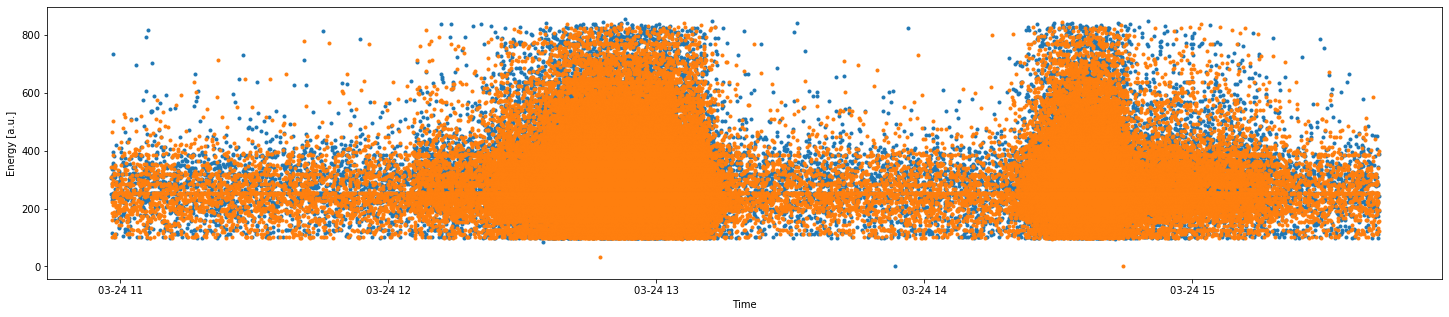

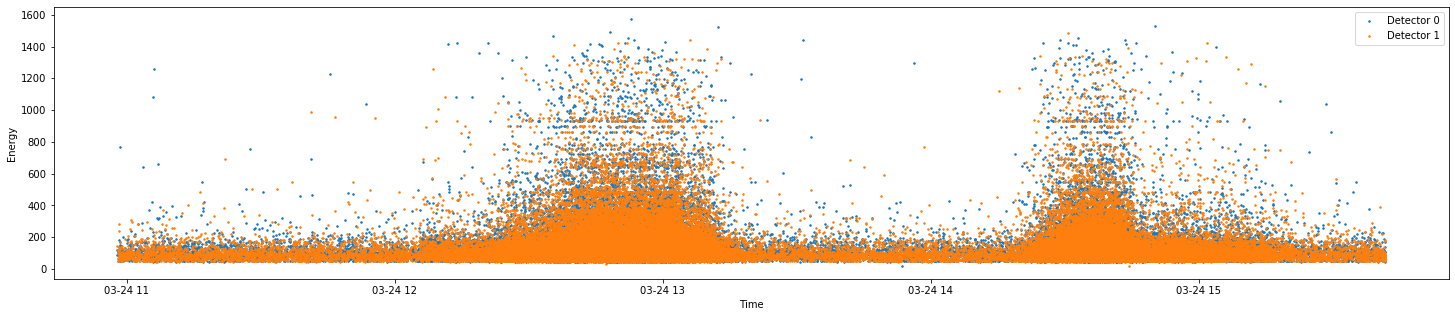

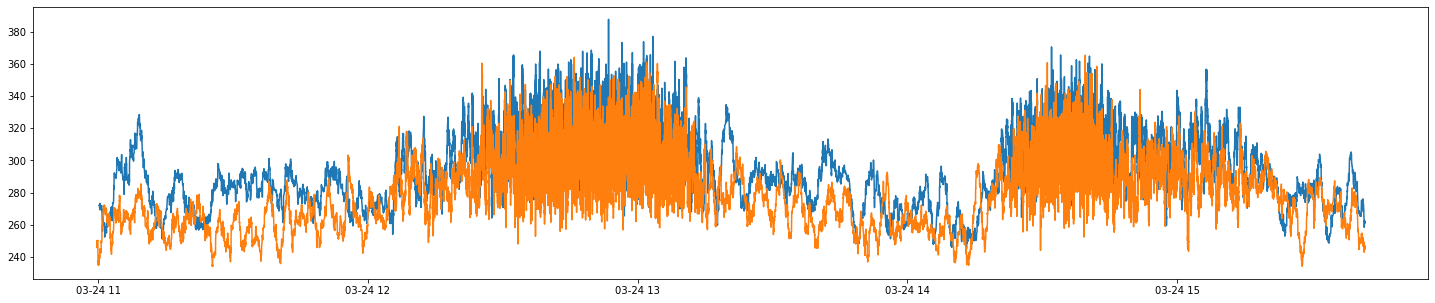

In [54]:
plt.figure(figsize=(25,5))
plt.plot(df1[3],ls='', marker='.')
plt.plot(df2[3],ls='', marker='.')

plt.xlabel('Time')
plt.ylabel('Energy [a.u.]')

plt.figure(figsize=(25,5))
plt.plot(df1[4],ls='', marker='.', markersize=3, label='Detector 0')
plt.plot(df2[4],ls='', marker='.', markersize=3, label='Detector 1')

#plt.yscale('log')

plt.xlabel('Time')
plt.ylabel('Energy')
plt.legend()

plt.figure(figsize=(25,5))
WINDOW = 60
df1['roll'] = df1[3].rolling(WINDOW).mean()
df2['roll'] = df2[3].rolling(WINDOW).mean()
plt.plot(df1['roll'])
plt.plot(df2['roll'])


In [42]:
df1

,0,1,2,3,4,5,time,roll
time,,,,,,,,
2021-03-24 10:57:51.494861603,1.616583e+09,1,1842,252.25,90.68,727,2021-03-24 10:57:51.494861603,NaN
2021-03-24 10:57:51.944815397,1.616583e+09,2,2291,304.75,116.95,915,2021-03-24 10:57:51.944815397,NaN
2021-03-24 10:58:05.154304981,1.616583e+09,3,15501,284.25,105.87,3320,2021-03-24 10:58:05.154304981,NaN
2021-03-24 10:58:08.282713175,1.616583e+09,4,18628,313.25,121.86,3876,2021-03-24 10:58:08.282713175,NaN
2021-03-24 10:58:08.503883600,1.616583e+09,5,18850,117.00,50.48,3880,2021-03-24 10:58:08.503883600,NaN
...,...,...,...,...,...,...,...,...
2021-03-24 15:41:36.785947561,1.616600e+09,81234,17026892,282.00,104.72,3493916,2021-03-24 15:41:36.785947561,258.462500
2021-03-24 15:41:37.672293663,1.616600e+09,81235,17027809,286.25,106.90,3494106,2021-03-24 15:41:37.672293663,259.750000
2021-03-24 15:41:40.540909290,1.616601e+09,81236,17030686,387.75,172.47,3494668,2021-03-24 15:41:40.540909290,262.800000
